<ipython-input-7-aa7ecad39675>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labels = df['sentiment'].replace({'positive': 1, 'negative': 0}).values


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.6778 - loss: 0.5816 - val_accuracy: 0.8301 - val_loss: 0.4273
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.8626 - loss: 0.3775 - val_accuracy: 0.8678 - val_loss: 0.3114
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.9118 - loss: 0.2433 - val_accuracy: 0.8938 - val_loss: 0.2776
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.9401 - loss: 0.1795 - val_accuracy: 0.8884 - val_loss: 0.2836
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9522 - loss: 0.1482 - val_accuracy: 0.8900 - val_loss: 0.2861
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8903 - loss: 0.2827


Test Accuracy: 0.8900


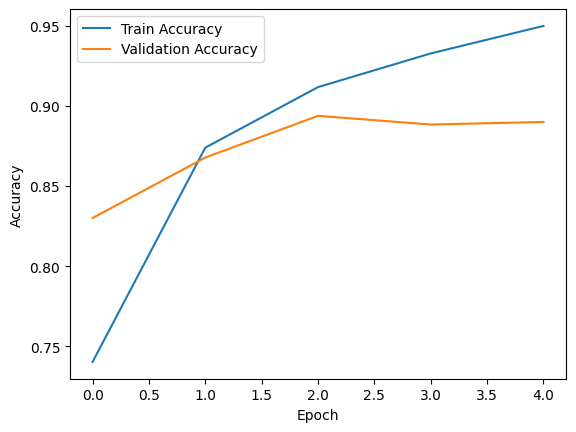

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading IMDB Dataset
df = pd.read_csv("/IMDB Dataset.csv")
texts = df['review'].astype(str).values
labels = df['sentiment'].replace({'positive': 1, 'negative': 0}).values

# Tokenization
vocab_size = 10000
max_length = 200
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Model Building (LSTM-based)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilation
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Training
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save Model
model.save("sentiment_analysis_model.h5")

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [8]:
model.save("sentiment_analysis_model.keras")

In [9]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the saved model
model = load_model("sentiment_analysis_model.keras")

# Example test sentence
test_sentence = ["This movie was amazing! I loved it."]
test_sequence = tokenizer.texts_to_sequences(test_sentence)
test_padded = pad_sequences(test_sequence, maxlen=max_length, padding='post')

# Predicting the sentiment in the above sentence
prediction = model.predict(test_padded)
print("Sentiment Score:", prediction[0][0])
print("Sentiment:", "Positive" if prediction[0][0] > 0.5 else "Negative")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 19 variables whereas the saved optimizer has 36 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
Sentiment Score: 0.9858226
Sentiment: Positive


In [10]:
import pickle

with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)